In [1]:
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

In [48]:
import os
import os.path as path
import numpy as np
import torch
from matplotlib.patches import Rectangle
from glob import glob
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import cv2
import random
import seaborn as sns
sns.set(font_scale=1.5)
from pprint import pprint
from IPython.display import HTML # to show the animation in Jupyter
import pandas as pd
from collections import Counter
from scipy.ndimage import convolve1d

plt.rcParams['xtick.labelsize'] = 11
plt.rcParams['ytick.labelsize'] = 11
sns.set_style("whitegrid", {'axes.grid' : False})
plt.rcParams["figure.autolayout"] = True
import sys
sys.path.append('../')
from src import utils, DataLevel

In [4]:
S3_test_df_10m  = pd.read_csv('/data2/hkaman/Livingston/EXPs/10m/EXP_S3_UNetLSTM_10m_time/S3_UNetLSTM_10m_time_test.csv',  index_col=0) 
S3_test_df_10m

,ytrue,ypred_w1,ypred_w2,ypred_w3,ypred_w4,ypred_w5,ypred_w6,ypred_w7,ypred_w8,ypred_w9,ypred_w10,ypred_w11,ypred_w12,ypred_w13,ypred_w14,ypred_w15
0,9.271487,7.107851,7.383129,7.417369,7.406979,7.393731,7.387751,7.384769,7.388635,7.389146,7.389381,7.388850,7.388715,7.390129,7.389918,7.389486
1,9.144121,7.999155,8.239926,8.252578,8.241622,8.231303,8.226707,8.224359,8.227503,8.227856,8.228014,8.227500,8.227377,8.228559,8.228359,8.227984
2,8.767210,7.801857,7.903316,7.897556,7.873969,7.858596,7.851728,7.848433,7.852315,7.852593,7.852701,7.851802,7.851592,7.852908,7.852819,7.852449
3,8.643302,7.777064,7.900037,7.909532,7.894905,7.883028,7.877634,7.874662,7.878200,7.878458,7.878552,7.877823,7.877642,7.878921,7.878750,7.878400
4,8.755239,7.853014,7.861228,7.835494,7.799169,7.774845,7.763668,7.757763,7.763102,7.763355,7.763463,7.761839,7.761445,7.762126,7.763123,7.763465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3185403,16.347725,11.871423,12.188835,12.399028,12.566824,12.713540,12.820307,12.923777,12.987963,13.097857,13.226547,13.272000,13.227103,13.209606,13.131932,13.101980
3185404,16.153316,11.731035,12.136208,12.423729,12.637764,12.781852,12.871824,12.957881,13.015036,13.113121,13.221598,13.258040,13.220806,13.207103,13.137008,13.108747
3185405,15.845532,11.723237,12.169763,12.497248,12.732432,12.874880,12.958688,13.037337,13.091204,13.179878,13.272116,13.302020,13.270901,13.259372,13.197952,13.172347
3185406,16.285854,11.892816,12.415793,12.803701,13.059339,13.203503,13.282550,13.354656,13.402531,13.485483,13.572966,13.599884,13.567618,13.555257,13.493581,13.468044


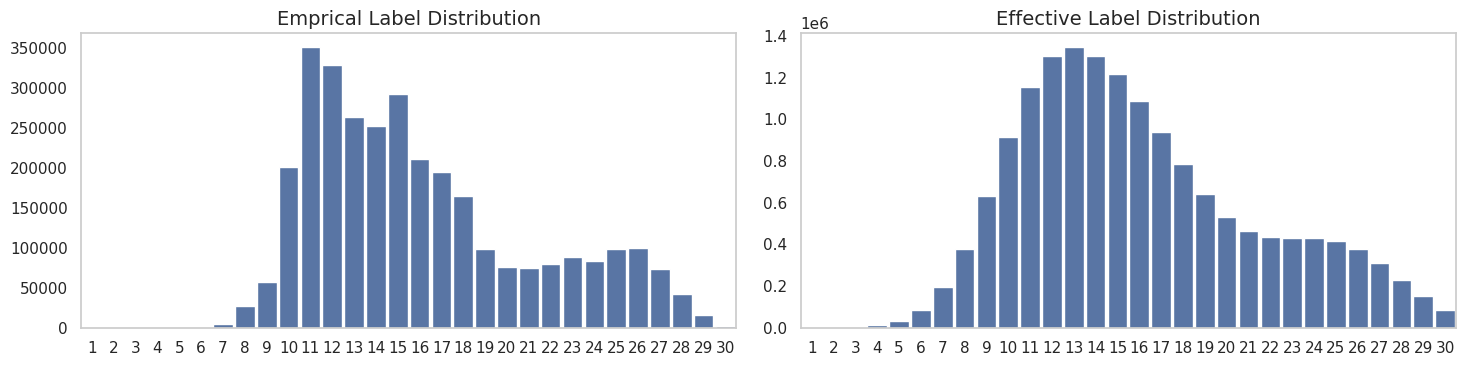

In [54]:
emp_label_dist, eff_label_dist = DataLevel.calc_lds_effective_dist(S3_test_df_10m, ks =20, sigma =2)
_ = utils.dual_emp_effective_hist_plot(emp_label_dist, eff_label_dist)